# Simulations for determining general variance of noise across various imaging cases

In [1]:
from visibilities import *
from images import *
import matplotlib.pyplot as plt
import matplotlib
import numpy
import helpers
import os
import logging, sys

cmap='turbo'
matplotlib.rcParams['figure.figsize'] = [10, 5]
plt.set_loglevel("critical")

## Load visibility layouts for long and short baseline databases, the same division is used for all three of our test cases so can use the same layout for all

In [2]:
from rascil.processing_components import create_visibility_from_ms

[vt] = create_visibility_from_ms('data/SGRA.ms')
[vs] = create_visibility_from_ms('data3/SGRA_small_baselines.ms')
[vl] = create_visibility_from_ms('data3/SGRA_long_baselines.ms')

create_visibility_from_ms: {'type': 'Measurement Set', 'subType': '', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\n'}
create_visibility_from_ms: Reading unique fields [0], unique data descriptions [0]
create_visibility_from_ms: Found 249600 rows
create_visibility_from_ms: Found 1 channels
create_visibility_from_ms: Reading all 1 channels
create_visibility_from_ms: Observation from 2000-01-01 17:37:07.746 to 2000-01-01 21:35:07.746
create_visibility_from_ms: {'type': 'Measurement Set', 'subType': 'UVFITS', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\nThis is a measurement set Table holding astronomical observations\n'}
create_visibility_from_ms: Reading unique fields [0], unique data descriptions [0]
create_visibility_from_ms: Found 183337 rows
create_visibility_from_ms: Found 1 channels
create_visibility_from_ms: Reading all 1 channels
create_visibility_from_ms: Observation from 2000-01-01 17:37:07.746 to 2000-01-0

/home/sunwang/.local/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


create_visibility_from_ms: {'type': 'Measurement Set', 'subType': 'UVFITS', 'readme': 'This is a MeasurementSet Table holding measurements from a Telescope\nThis is a measurement set Table holding astronomical observations\n'}
create_visibility_from_ms: Reading unique fields [0], unique data descriptions [0]
create_visibility_from_ms: Found 76909 rows
create_visibility_from_ms: Found 1 channels
create_visibility_from_ms: Reading all 1 channels
create_visibility_from_ms: Observation from 2000-01-01 17:37:07.746 to 2000-01-01 21:35:07.746


/home/sunwang/.local/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)
/home/sunwang/.local/lib/python3.10/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapp

## Compute Noise for Long and Short baselines for Sgr A

### Read visibilities into long and short visibilities respectively

Model image plate scale (arcsec) is 3.814768e+00
Model image plate scale (arcsec) is 3.814768e+00


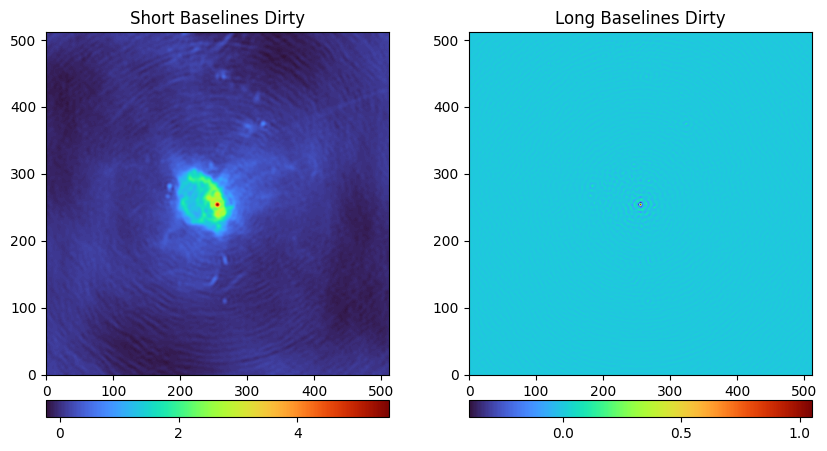

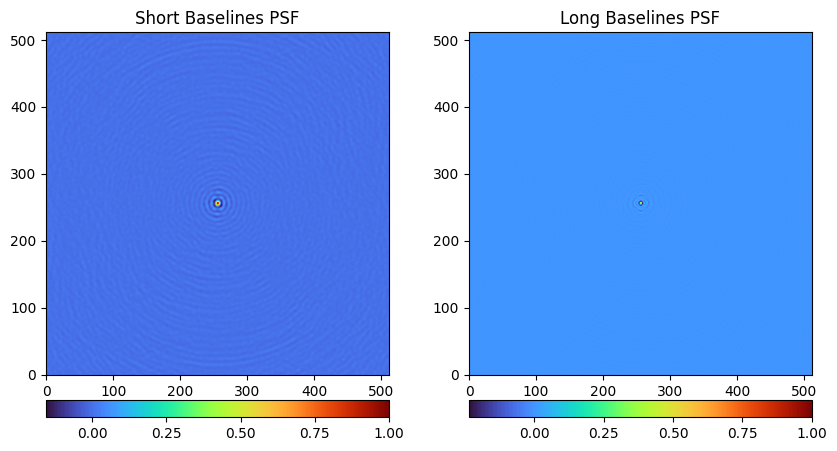

In [3]:
logging.getLogger().setLevel(logging.CRITICAL)

vt, full_cellsize, im = visibilities_from_image(vt,'data/SGRA_full_gt.fits',return_cellsize=True,return_image=True,scale_factor=1.8)
stdv_real = numpy.std(numpy.array(vt.vis.real).flatten())
stdv_imag = numpy.std(numpy.array(vt.vis.imag).flatten())
dev = numpy.std(vt.vis.data.flatten())

vl, cell_size, im = visibilities_from_image(vl,'data/SGRA_full_gt.fits',return_cellsize=True,return_image=True, \
                                            scale_factor=1.8, override_cellsize=True, ocellsize=full_cellsize)
vs, cell_size, im = visibilities_from_image(vs,'data/SGRA_full_gt.fits',return_cellsize=True,return_image=True, \
                                            scale_factor=1.8, override_cellsize=True, ocellsize=full_cellsize)

dirty_l, psf_l = dirty_psf_from_visibilities(vl, full_cellsize, npix=512, weighting="uniform")
dirty_s, psf_s = dirty_psf_from_visibilities(vs, full_cellsize, npix=512, weighting="uniform")

helpers.plotNImages([dirty_s.pixels.data, dirty_l.pixels.data], ["Short Baselines Dirty", "Long Baselines Dirty"], cmap)
helpers.plotNImages([psf_s.pixels.data, psf_l.pixels.data], ["Short Baselines PSF", "Long Baselines PSF"], cmap)

logging.getLogger().setLevel(logging.NOTSET)

### Compute long baselines variance in image plane for some given amount of noise

### Same as above but for short baseline visibilities

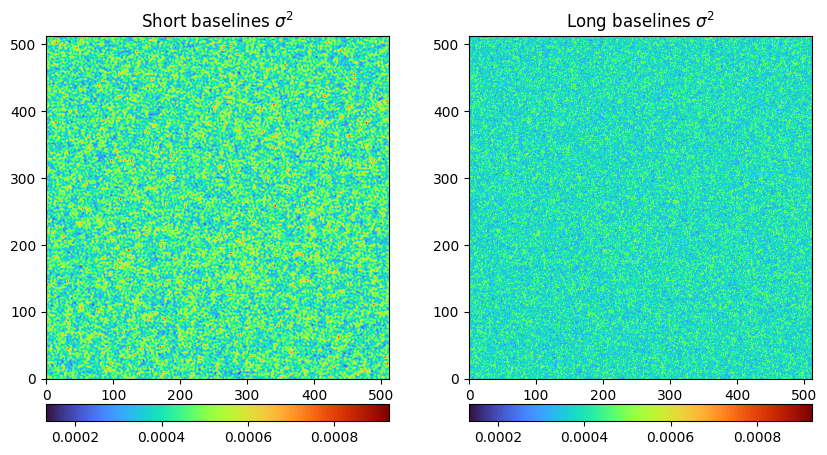

SGRA Mean variance for short baselines: 0.00043272507479294133
SGRA Mean variance for long baselines: 0.0003930532279872729


In [4]:
varimgs = helpers.readFits("results/noise_results/SGRA_short_variance_pixel.fits")
varimgl = helpers.readFits("results/noise_results/SGRA_long_variance_pixel.fits")

mean_var_s = numpy.mean(varimgs.flatten())
mean_var_l = numpy.mean(varimgl.flatten())

helpers.plotNImages([varimgs, varimgl], ["Short baselines $\sigma^2$", "Long baselines $\sigma^2$"], cmap, same_scale=True)
print("SGRA Mean variance for short baselines: " + str(mean_var_s))
print("SGRA Mean variance for long baselines: " + str(mean_var_l))

### Compute variance in the visibility domain

Visibility variances - long: 4.641822585384219e-05 short: 0.00016237469585560872


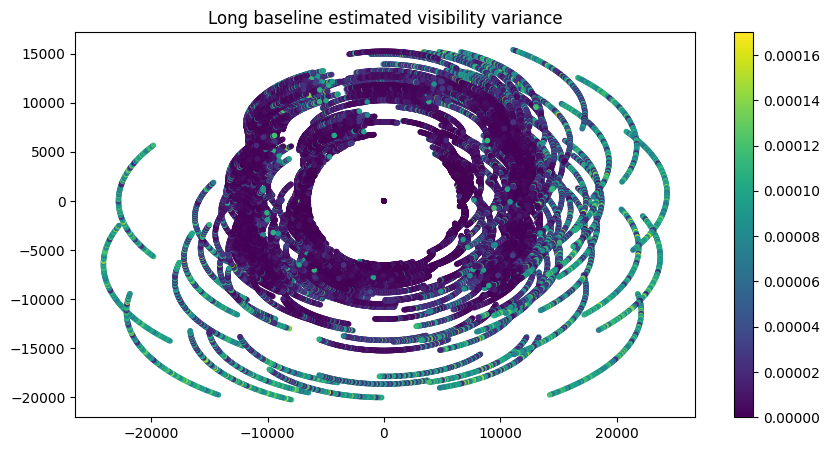

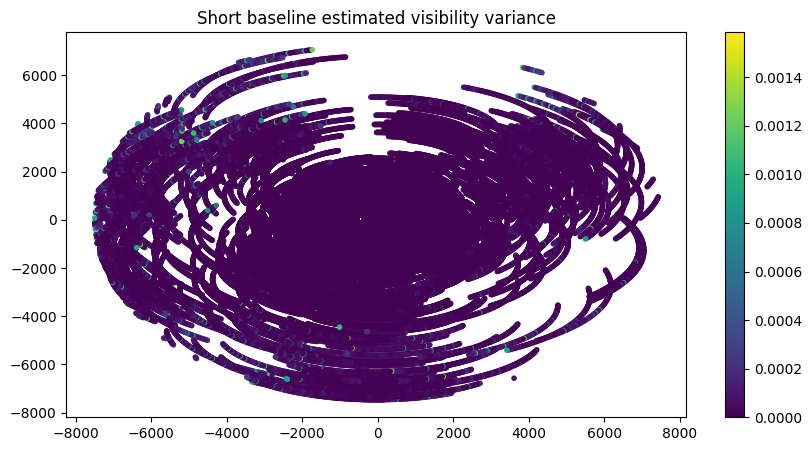

In [5]:
tot_weights_l = numpy.sum(vl.visibility_acc.flagged_imaging_weight.astype("f8"))
tot_weights_s = numpy.sum(vs.visibility_acc.flagged_imaging_weight.astype("f8"))

normweights_l = vl.visibility_acc.flagged_imaging_weight.astype("f8").flatten() / tot_weights_l
normweights_s = vs.visibility_acc.flagged_imaging_weight.astype("f8").flatten() / tot_weights_s

n = 50

all_vis_l = numpy.zeros((n, vt["vis"].data.size), dtype=numpy.csingle)
all_vis_s = numpy.zeros((n, vt["vis"].data.size), dtype=numpy.csingle)

for i in range(0, n):
    real = numpy.random.normal(loc=0, scale=stdv_real, size=vt["vis"].data.size)
    imag = numpy.random.normal(loc=0, scale=stdv_imag, size=vt["vis"].data.size)
    
    all_vis_l[i] = numpy.vectorize(complex)(real, imag)
    
for i in range(0, n):
    real = numpy.random.normal(loc=0, scale=stdv_real, size=vt["vis"].data.size)
    imag = numpy.random.normal(loc=0, scale=stdv_imag, size=vt["vis"].data.size)
    
    all_vis_s[i] = numpy.vectorize(complex)(real, imag)
    
vis_long = all_vis_l * normweights_l
vis_short = all_vis_s * normweights_s
    
visvarl = numpy.var(vis_long, axis=0)
visvars = numpy.var(vis_short, axis=0)
visvarl = numpy.reshape(visvarl, vt["vis"].data.shape)
visvars = numpy.reshape(visvars, vt["vis"].data.shape)

simulated_long = numpy.sum(visvarl) / tot_weights_l
simulated_short = numpy.sum(visvars) / tot_weights_s

print("Visibility variances - long: " + str(simulated_long) + " short: " + str(simulated_short))

u = vl.visibility_acc.uvw_lambda.T[0].T.flatten().data
v = vl.visibility_acc.uvw_lambda.T[1].T.flatten().data
c = visvarl

plt.title('Long baseline estimated visibility variance')
plt.scatter(u,v,c=c,marker='.')
plt.colorbar()

plt.show()

u = vs.visibility_acc.uvw_lambda.T[0].T.flatten().data
v = vs.visibility_acc.uvw_lambda.T[1].T.flatten().data
c = visvars

plt.title('Short baseline estimated visibility variance')
plt.scatter(u,v,c=c,marker='.')
plt.colorbar()

plt.show()

### Now compute variance on reconstructed short baselines

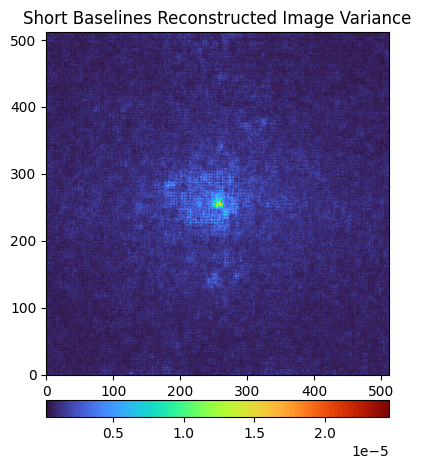

Mean reconstruction variance: 1.0913129430786371e-06


In [6]:
varimg = helpers.readFits("results/noise_results/SGRA_reconstruction_variance_pixel.fits")
mean_var_r = numpy.mean(varimg.flatten())
helpers.plotNImages([varimg], ["Short Baselines Reconstructed Image Variance"], cmap)
print("Mean reconstruction variance: " + str(mean_var_r))

## Compute Noise for Long and Short baselines for Sgr B2

### Read visibilities into long and short visibilities respectively

Model image plate scale (arcsec) is 3.814768e+00
Model image plate scale (arcsec) is 3.814768e+00


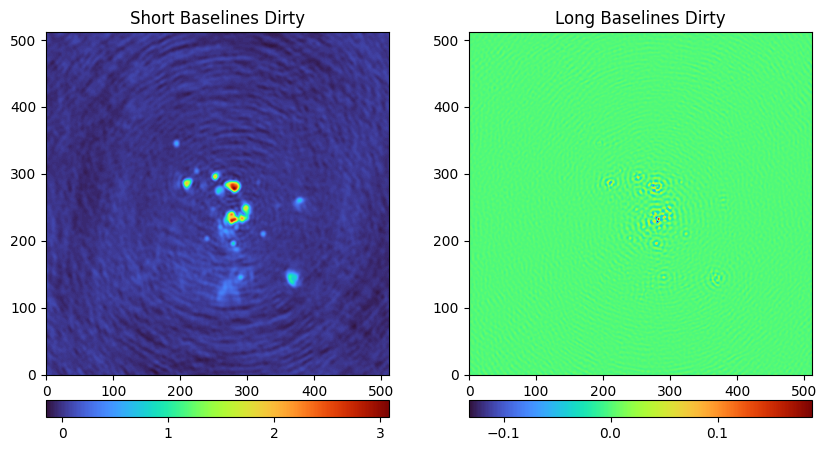

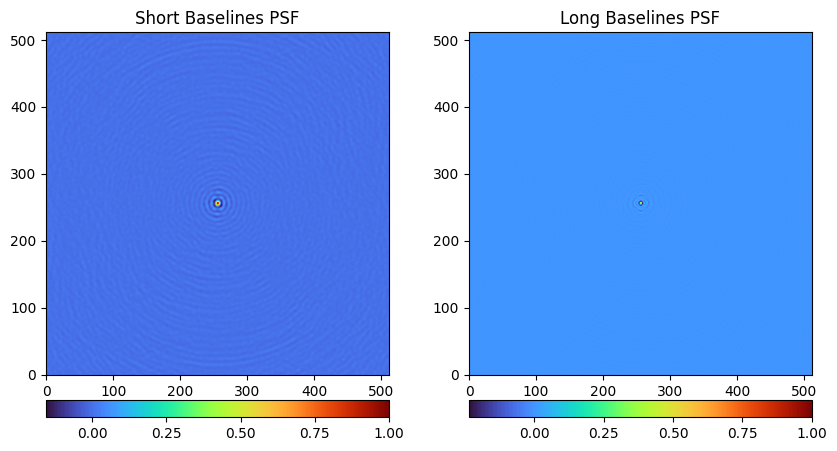

In [7]:
logging.getLogger().setLevel(logging.CRITICAL)

vt, full_cellsize, im = visibilities_from_image(vt,'data/SGRB_full_gt.fits',return_cellsize=True,return_image=True,scale_factor=1.8)
stdv_real = numpy.std(numpy.array(vt.vis.real).flatten())
stdv_imag = numpy.std(numpy.array(vt.vis.imag).flatten())
dev = numpy.std(vt.vis.data.flatten())

vl, cell_size, im = visibilities_from_image(vl,'data/SGRB_full_gt.fits',return_cellsize=True,return_image=True, \
                                            scale_factor=1.8, override_cellsize=True, ocellsize=full_cellsize)
vs, cell_size, im = visibilities_from_image(vs,'data/SGRB_full_gt.fits',return_cellsize=True,return_image=True, \
                                            scale_factor=1.8, override_cellsize=True, ocellsize=full_cellsize)

dirty_l, psf_l = dirty_psf_from_visibilities(vl, full_cellsize, npix=512, weighting="uniform")
dirty_s, psf_s = dirty_psf_from_visibilities(vs, full_cellsize, npix=512, weighting="uniform")

helpers.plotNImages([dirty_s.pixels.data, dirty_l.pixels.data], ["Short Baselines Dirty", "Long Baselines Dirty"], cmap)
helpers.plotNImages([psf_s.pixels.data, psf_l.pixels.data], ["Short Baselines PSF", "Long Baselines PSF"], cmap)

logging.getLogger().setLevel(logging.NOTSET)

### Compute long baselines variance in image plane for some given amount of noise

### Same as above but for short baseline visibilities

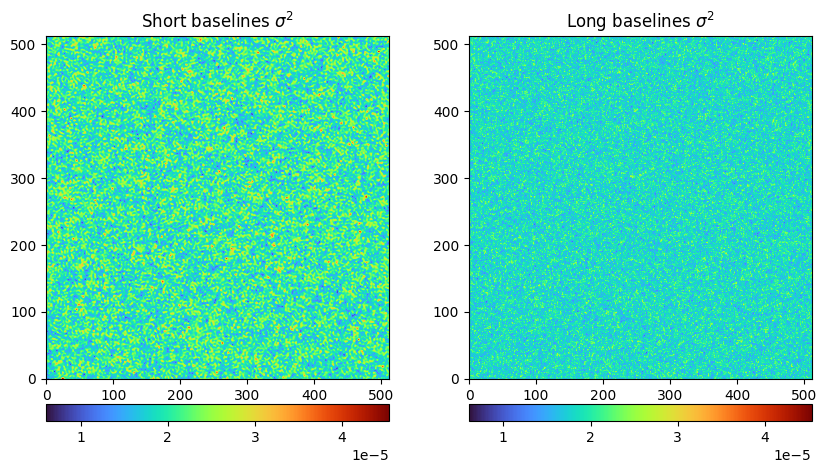

Mean variance for short baselines: 2.0269855364994938e-05
Mean variance for long baselines: 1.8441328613473928e-05


In [8]:
varimgs = helpers.readFits("results/noise_results/SGRB_short_variance_pixel.fits")
varimgl = helpers.readFits("results/noise_results/SGRB_long_variance_pixel.fits")

mean_var_s = numpy.mean(varimgs.flatten())
mean_var_l = numpy.mean(varimgl.flatten())

helpers.plotNImages([varimgs, varimgl], ["Short baselines $\sigma^2$", "Long baselines $\sigma^2$"], cmap, same_scale=True)
print("Mean variance for short baselines: " + str(mean_var_s))
print("Mean variance for long baselines: " + str(mean_var_l))

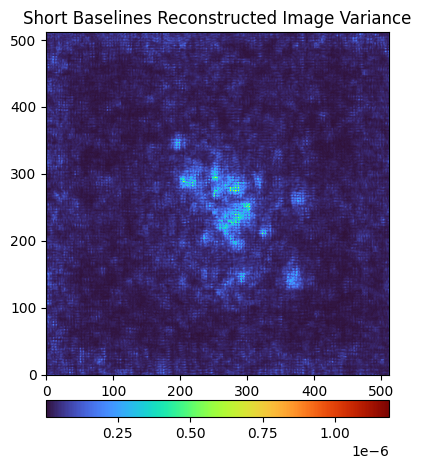

Mean reconstruction variance: 3.77785469753472e-08


In [9]:
varimg = helpers.readFits("results/noise_results/SGRB_reconstruction_variance_pixel.fits")
mean_var_r = numpy.mean(varimg.flatten())
helpers.plotNImages([varimg], ["Short Baselines Reconstructed Image Variance"], cmap)
print("Mean reconstruction variance: " + str(mean_var_r))

## Compute Noise for Long and Short baselines for Sgr C

### Read visibilities into long and short visibilities respectively

Model image plate scale (arcsec) is 3.814768e+00
Model image plate scale (arcsec) is 3.814768e+00


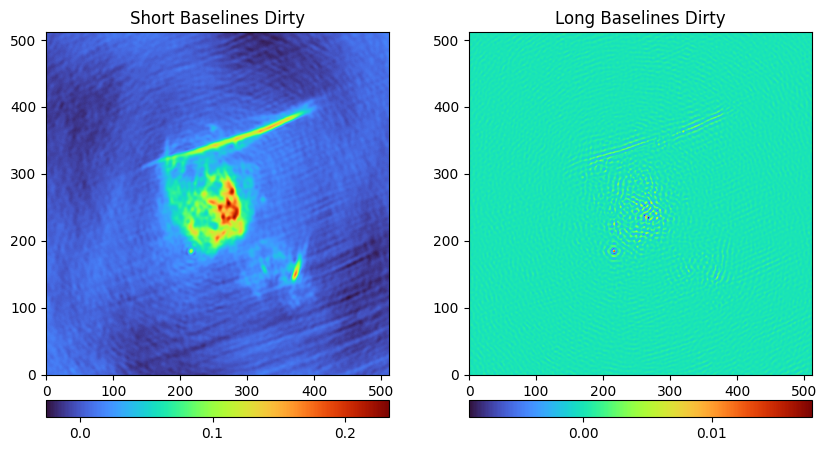

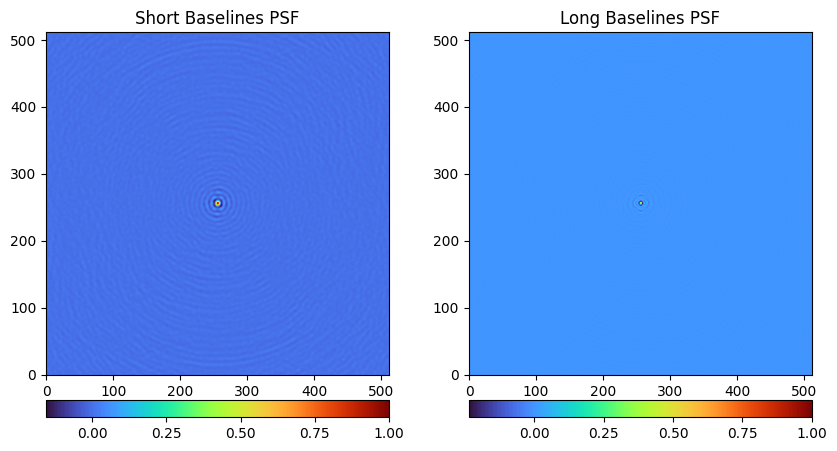

In [10]:
logging.getLogger().setLevel(logging.CRITICAL)

vt, full_cellsize, im = visibilities_from_image(vt,'data/SGRC_full_gt.fits',return_cellsize=True,return_image=True,scale_factor=1.8)
stdv_real = numpy.std(numpy.array(vt.vis.real).flatten())
stdv_imag = numpy.std(numpy.array(vt.vis.imag).flatten())
dev = numpy.std(vt.vis.data.flatten())

vl, cell_size, im = visibilities_from_image(vl,'data/SGRC_full_gt.fits',return_cellsize=True,return_image=True, \
                                            scale_factor=1.8, override_cellsize=True, ocellsize=full_cellsize)
vs, cell_size, im = visibilities_from_image(vs,'data/SGRC_full_gt.fits',return_cellsize=True,return_image=True, \
                                            scale_factor=1.8, override_cellsize=True, ocellsize=full_cellsize)

dirty_l, psf_l = dirty_psf_from_visibilities(vl, full_cellsize, npix=512, weighting="uniform")
dirty_s, psf_s = dirty_psf_from_visibilities(vs, full_cellsize, npix=512, weighting="uniform")

helpers.plotNImages([dirty_s.pixels.data, dirty_l.pixels.data], ["Short Baselines Dirty", "Long Baselines Dirty"], cmap)
helpers.plotNImages([psf_s.pixels.data, psf_l.pixels.data], ["Short Baselines PSF", "Long Baselines PSF"], cmap)

logging.getLogger().setLevel(logging.NOTSET)

### Compute long baselines variance in image plane for some given amount of noise

### Same as above but for short baseline visibilities

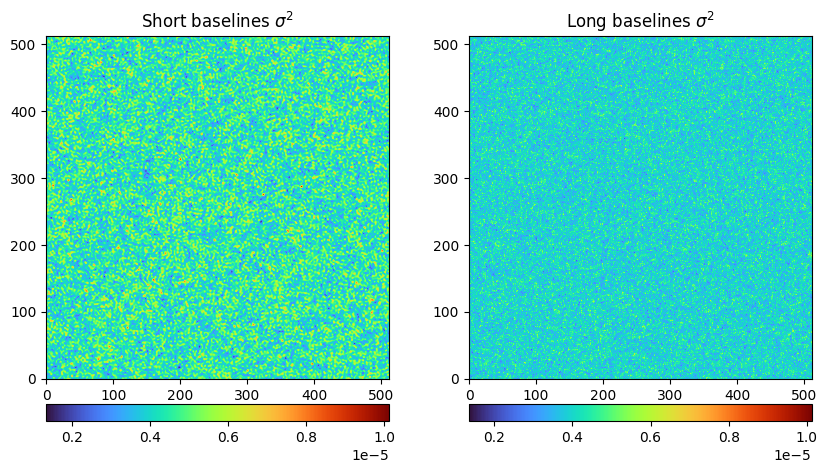

Mean variance for short baselines: 4.440812556407429e-06
Mean variance for long baselines: 3.991055856182312e-06


In [11]:
varimgs = helpers.readFits("results/noise_results/SGRC_short_variance_pixel.fits")
varimgl = helpers.readFits("results/noise_results/SGRC_long_variance_pixel.fits")

mean_var_s = numpy.mean(varimgs.flatten())
mean_var_l = numpy.mean(varimgl.flatten())

helpers.plotNImages([varimgs, varimgl], ["Short baselines $\sigma^2$", "Long baselines $\sigma^2$"], cmap, same_scale=True)
print("Mean variance for short baselines: " + str(mean_var_s))
print("Mean variance for long baselines: " + str(mean_var_l))

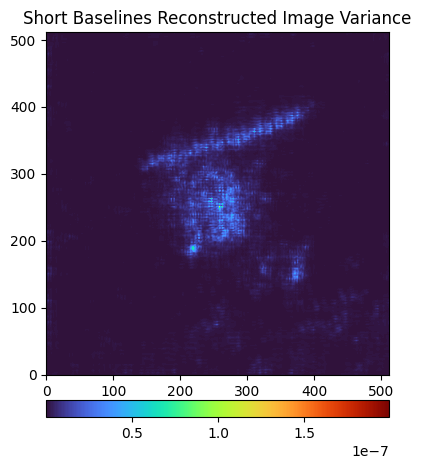

Mean reconstruction variance: 1.4641727337902196e-09


In [12]:
varimg = helpers.readFits("results/noise_results/SGRC_reconstruction_variance_pixel.fits")
mean_var_r = numpy.mean(varimg.flatten())
helpers.plotNImages([varimg], ["Short Baselines Reconstructed Image Variance"], cmap)
print("Mean reconstruction variance: " + str(mean_var_r))

## 